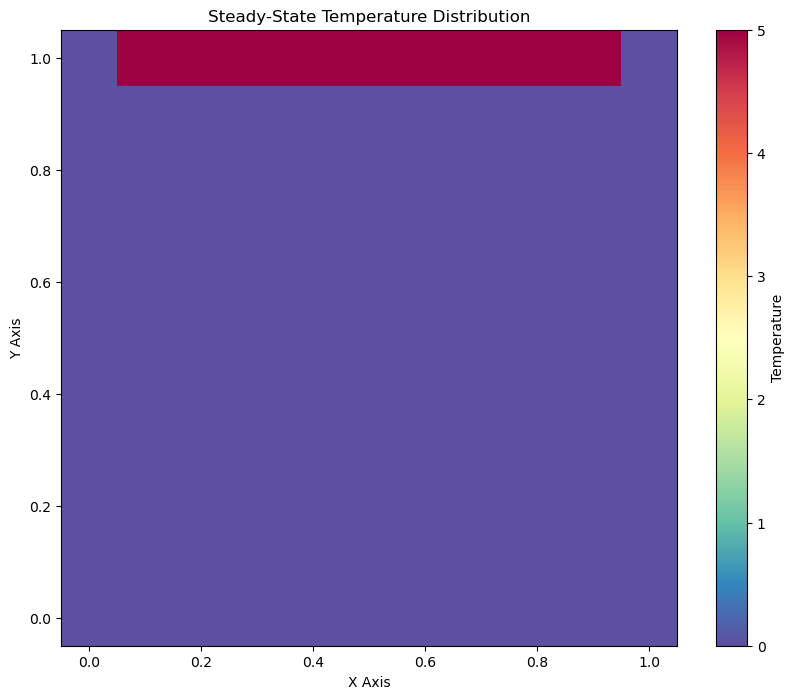

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Domain settings
L = 1.0  # Length of the domain
N = 11  # Number of points in each dimension
h = L / (N - 1)  # Grid spacing
K = 1.0  # Thermal conductivity

# Initialize the temperature array
T = np.zeros((N, N))
# Boundary conditions
T[0, :] = 0  # bottom boundary
T[-1, :] = 5
T[:, 0] = 0  # right boundary
T[:, -1] = 0  # left boundary



# Iteration settings
tolerance = 1e-7
error = 1.0
iteration = 0
error_list = []

# Visualization of temperature distribution using pcolormesh
plt.figure(figsize=(10, 8))
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
c = plt.pcolormesh(X, Y, T, cmap='Spectral_r', shading='auto')
plt.colorbar(c, label='Temperature')
plt.title('Steady-State Temperature Distribution')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
#plt.grid(True, which='both', color='w', linestyle='-', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Annotating each cell with its temperature value
#for i in range(N):
    #for j in range(N):
        #plt.text(X[i, j], Y[i, j], f'{T[i, j]:.3f}', color='black', ha='center', va='center', fontsize=7)

plt.show()



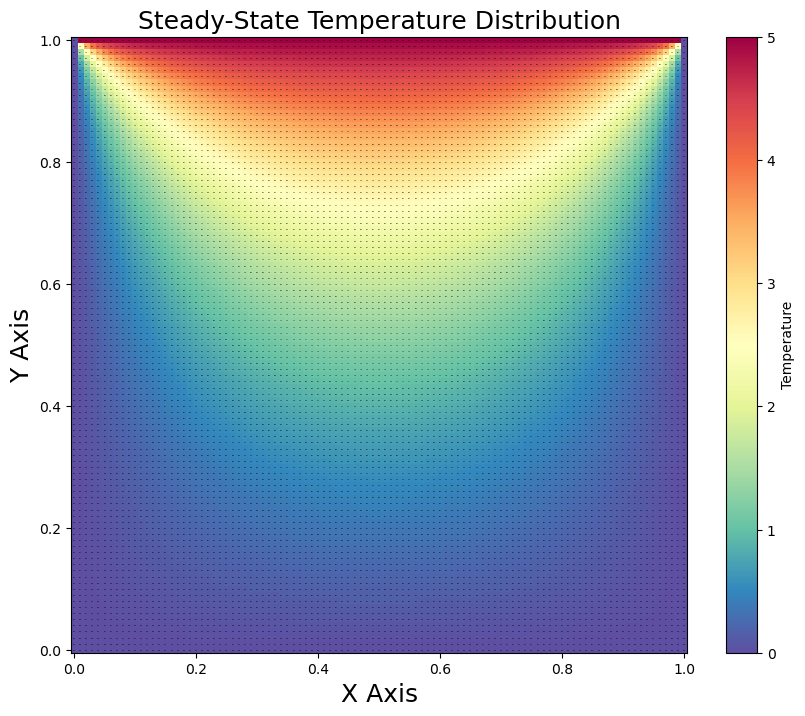

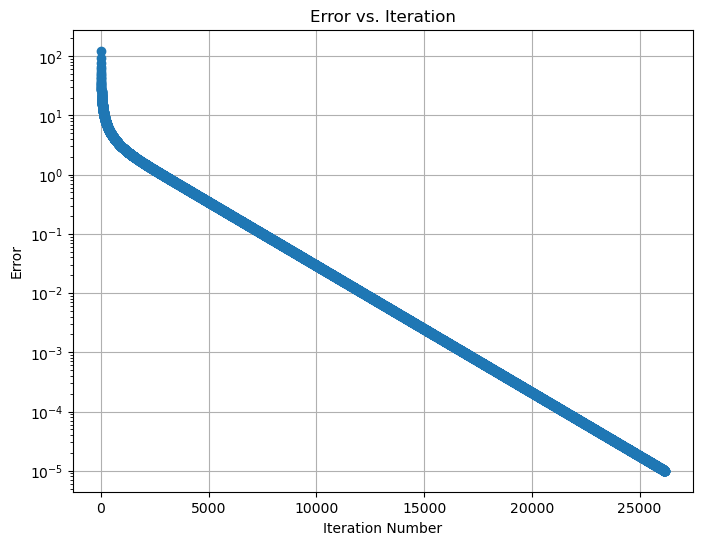

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Domain settings
L = 1.0  # Length of the domain
N = 101  # Number of points in each dimension
h = L / (N - 1)  # Grid spacing
K = 1.0  # Thermal conductivity

# Initialize the temperature array
T = np.zeros((N, N))

# Boundary conditions
T[0, :] = 0  # bottom boundary
T[-1, :] = 5 #Top boundary
T[:, 0] = 0  # right boundary
T[:, -1] = 0  # left boundary


# Iteration settings
tolerance = 1e-5
error = 1.0
iteration = 0
error_list = []

# Simulation loop
while error > tolerance:
    T_new = T.copy()
    error = 0.0
    for i in range(1, N-1):
        for j in range(1, N-1):
            temp = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
            error += abs(temp - T[i, j])
            T_new[i, j] = temp
    T = T_new
    error_list.append(error)
    iteration += 1

# Visualization of temperature distribution using pcolormesh
plt.figure(figsize=(10, 8))
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
c = plt.pcolormesh(X, Y, T, cmap='Spectral_r', shading='auto')
#plt.contourf(X, Y, T, cmap='Spectral_r', shading='auto')
plt.colorbar(c, label='Temperature')
plt.title('Steady-State Temperature Distribution', fontsize=18)
plt.xlabel('X Axis', fontsize=18)
plt.ylabel('Y Axis', fontsize=18)
#plt.grid(True, which='both', color='w', linestyle='-', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Annotating each cell with its temperature value
for i in range(N):
    for j in range(N):
        plt.text(X[i, j], Y[i, j], f'{T[i, j]:.2f}', color='black', ha='center', va='center', fontsize=1)

plt.show()

# Error vs Iteration graph
plt.figure(figsize=(8, 6))
plt.plot(error_list, marker='o')
plt.title('Error vs. Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.yscale('log')  # Log scale for better visibility of convergence
plt.grid(True)
plt.show()
